## Import library


In [2]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

from sklearn.model_selection import StratifiedShuffleSplit as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## Import data and explore


In [3]:
# Import data
df = pd.read_csv("Customer-Churn-Records.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Data preparation


In [5]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [6]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
# Change data type from float to int
df_int = df.astype({"Balance":'int64', "EstimatedSalary":'int64'})
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   RowNumber           10000 non-null  int64 
 1   CustomerId          10000 non-null  int64 
 2   Surname             10000 non-null  object
 3   CreditScore         10000 non-null  int64 
 4   Geography           10000 non-null  object
 5   Gender              10000 non-null  object
 6   Age                 10000 non-null  int64 
 7   Tenure              10000 non-null  int64 
 8   Balance             10000 non-null  int64 
 9   NumOfProducts       10000 non-null  int64 
 10  HasCrCard           10000 non-null  int64 
 11  IsActiveMember      10000 non-null  int64 
 12  EstimatedSalary     10000 non-null  int64 
 13  Exited              10000 non-null  int64 
 14  Complain            10000 non-null  int64 
 15  Satisfaction Score  10000 non-null  int64 
 16  Card Type           100

In [8]:
df_int.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807,1,0,1,112542,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660,3,1,0,113931,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510,1,1,1,79084,0,0,5,GOLD,425


### Missing value


In [9]:
# Check null value
df_int.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [10]:
# Check duplicated data
df_int[df_int.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


### Check df_int


In [11]:
# Check statiistical characteristic of dataset
df_int.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.571500,1.530200,0.70550,0.515100,100089.748400,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.185107,0.581654,0.45584,0.499797,57510.491042,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.000000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51001.750000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.000000,1.000000,1.00000,1.000000,100193.500000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127643.750000,2.000000,1.00000,1.000000,149387.750000,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.000000,4.000000,1.00000,1.000000,199992.000000,1.000000,1.000000,5.000000,1000.000000


In [12]:
# List unique
df_int.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6205
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9770
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [13]:
df_int.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

## EDA


### Boxplot (Continuous variables)


<Axes: xlabel='CreditScore'>

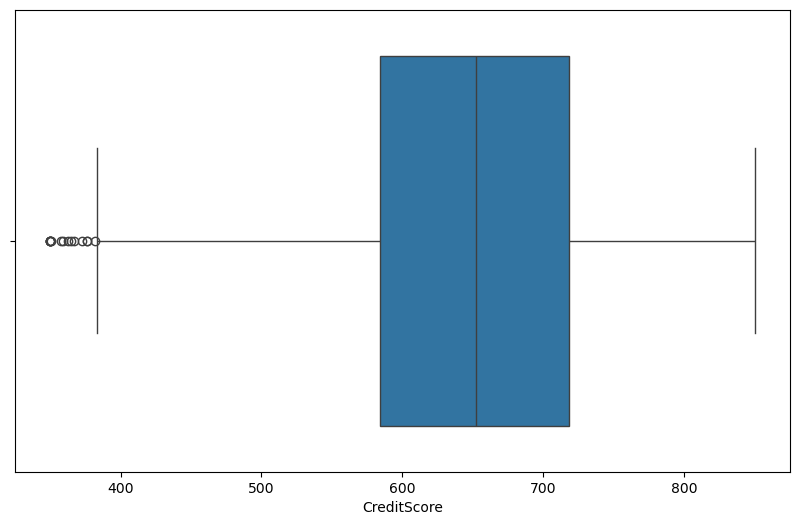

In [14]:
# CreditScore Box plot
plt.figure(figsize=(10,6))
sns.boxplot(data = df_int, x="CreditScore")

<Axes: xlabel='Age'>

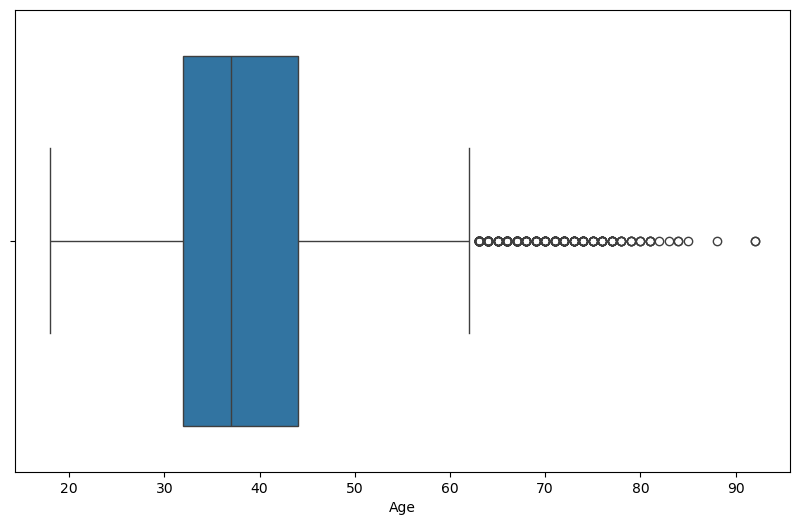

In [15]:
# Age Box plot
plt.figure(figsize=(10,6))
sns.boxplot(data = df_int, x="Age")

<Axes: xlabel='Balance'>

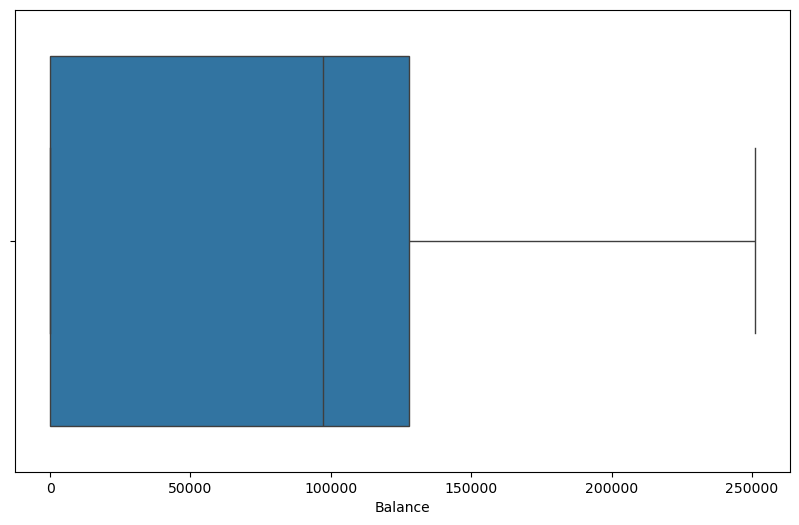

In [16]:
# Balance Box plot
plt.figure(figsize=(10,6))
sns.boxplot(data = df_int, x="Balance")

<Axes: xlabel='EstimatedSalary'>

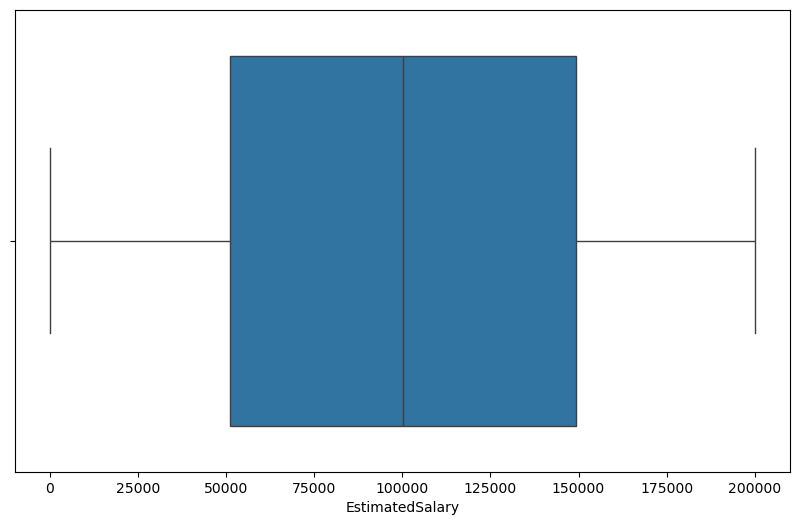

In [17]:
# EstimatedSalary Box plot
plt.figure(figsize=(10,6))
sns.boxplot(data = df_int, x="EstimatedSalary")

<Axes: xlabel='Point Earned'>

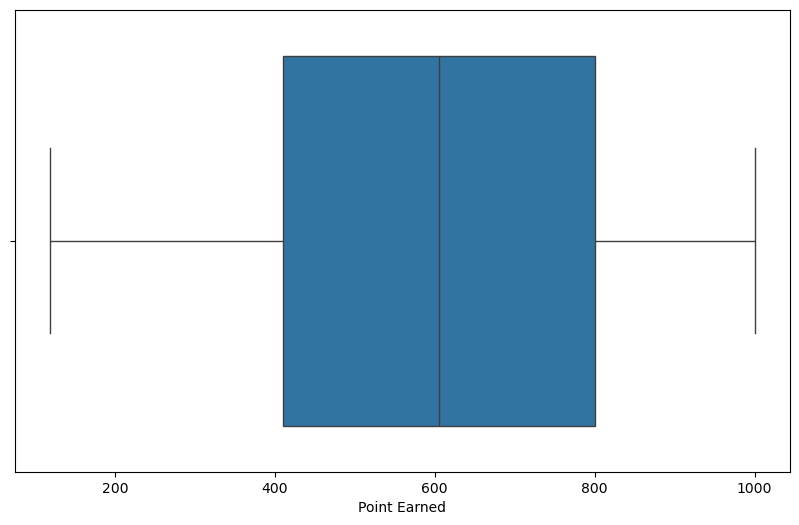

In [18]:
# Point Earned Box plot
plt.figure(figsize=(10,6))
sns.boxplot(data = df_int, x="Point Earned")

### Correlation


In [19]:
# Select numeric dataframe
numeric_df = df_int.select_dtypes(include=[np.number])
numeric_df

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,1,15634602,619,42,2,0,1,1,1,101348,1,1,2,464
1,2,15647311,608,41,1,83807,1,0,1,112542,0,1,3,456
2,3,15619304,502,42,8,159660,3,1,0,113931,1,1,3,377
3,4,15701354,699,39,1,0,2,0,0,93826,0,0,5,350
4,5,15737888,850,43,2,125510,1,1,1,79084,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0,2,1,0,96270,0,0,1,300
9996,9997,15569892,516,35,10,57369,1,1,1,101699,0,0,5,771
9997,9998,15584532,709,36,7,0,1,0,1,42085,1,1,3,564
9998,9999,15682355,772,42,3,75075,2,1,0,92888,1,1,2,339


<Axes: >

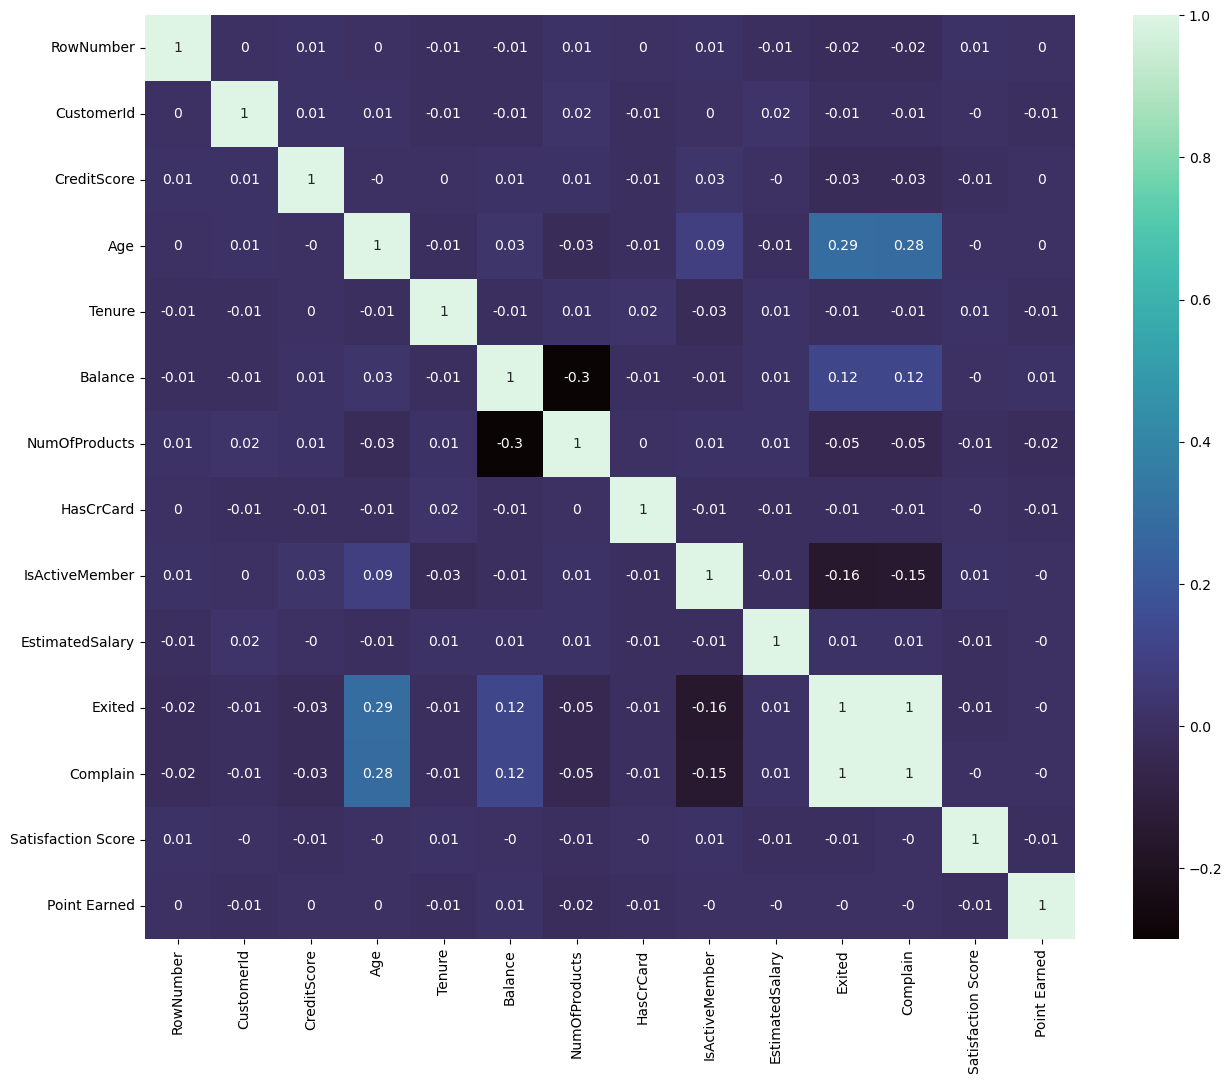

In [20]:
# Correlation heatmap
corr = numeric_df.corr().round(2)
plt.figure(figsize=(15,12))
sns.heatmap(data=corr,cmap='mako', cbar=True, annot=True)

### Distribution (Continuous variables)


In [21]:
numeric_df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned'],
      dtype='object')

<Axes: xlabel='Point Earned', ylabel='Count'>

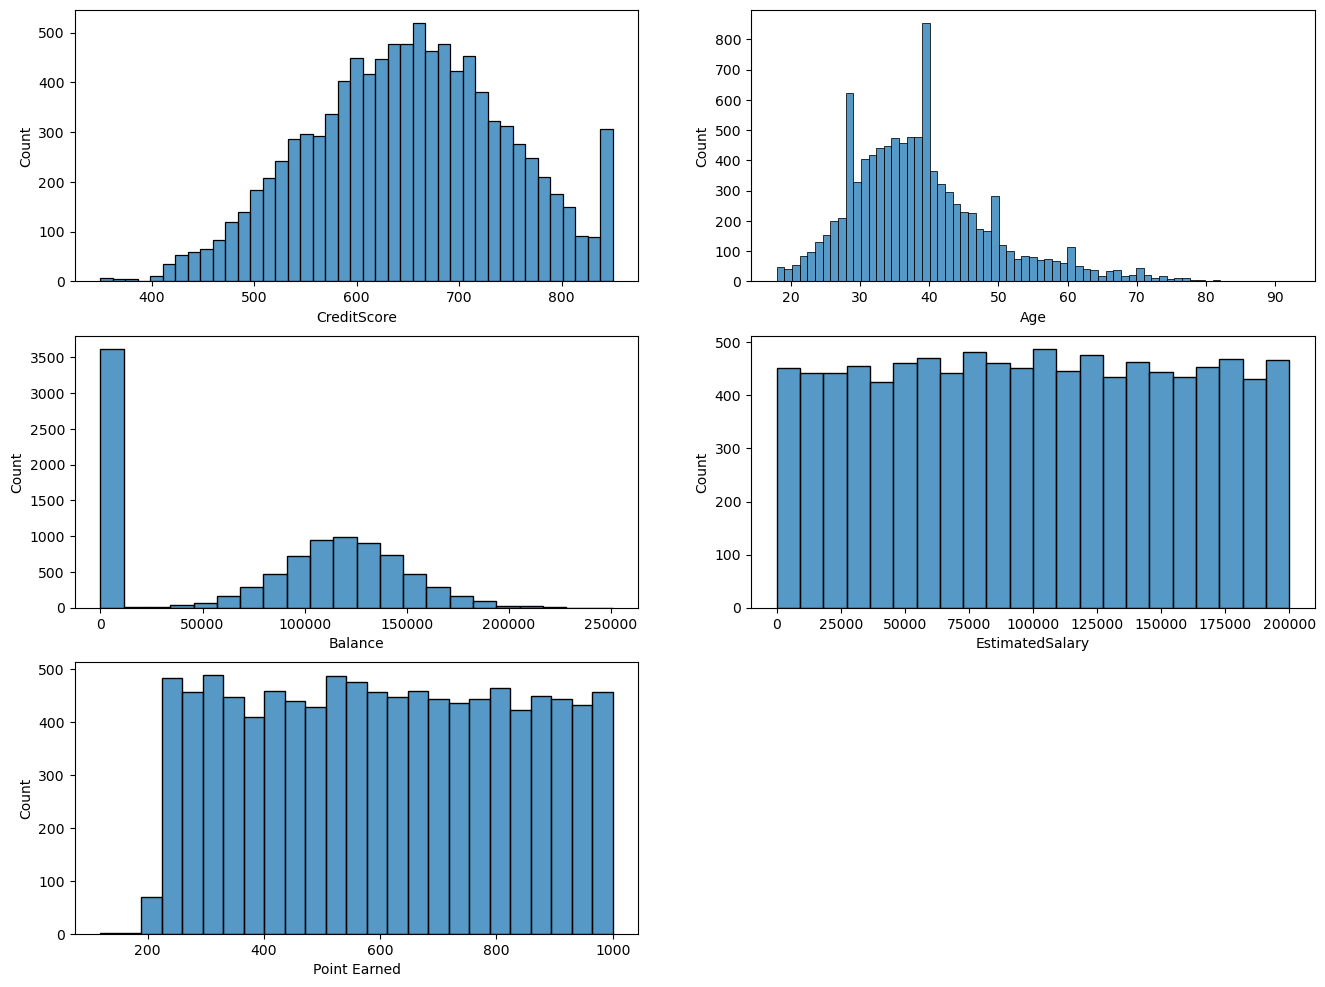

In [22]:
# plot distribution
plt.figure(figsize = (16,12))

plt.subplot(3,2,1)
sns.histplot(x=df_int['CreditScore'])

plt.subplot(3,2,2)
sns.histplot(x=df_int['Age'])

plt.subplot(3,2,3)
sns.histplot(x=df_int['Balance'])

plt.subplot(3,2,4)
sns.histplot(x=df_int['EstimatedSalary'])

plt.subplot(3,2,5)
sns.histplot(x=df_int['Point Earned'])

### Categorical (Univariate)


C:\Users\fsukr\AppData\Local\Temp\ipykernel_2156\3625908332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Geography', palette = 'Paired', data = df_int)
C:\Users\fsukr\AppData\Local\Temp\ipykernel_2156\3625908332.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', palette = 'Paired', data = df_int)
C:\Users\fsukr\AppData\Local\Temp\ipykernel_2156\3625908332.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Tenure', palette = 'Paired', data = df_int)
C:\Users\fsukr\AppData\Local\Temp\ipykernel_2156\3625

<Axes: title={'center': 'Card Type'}, xlabel='Card Type', ylabel='count'>

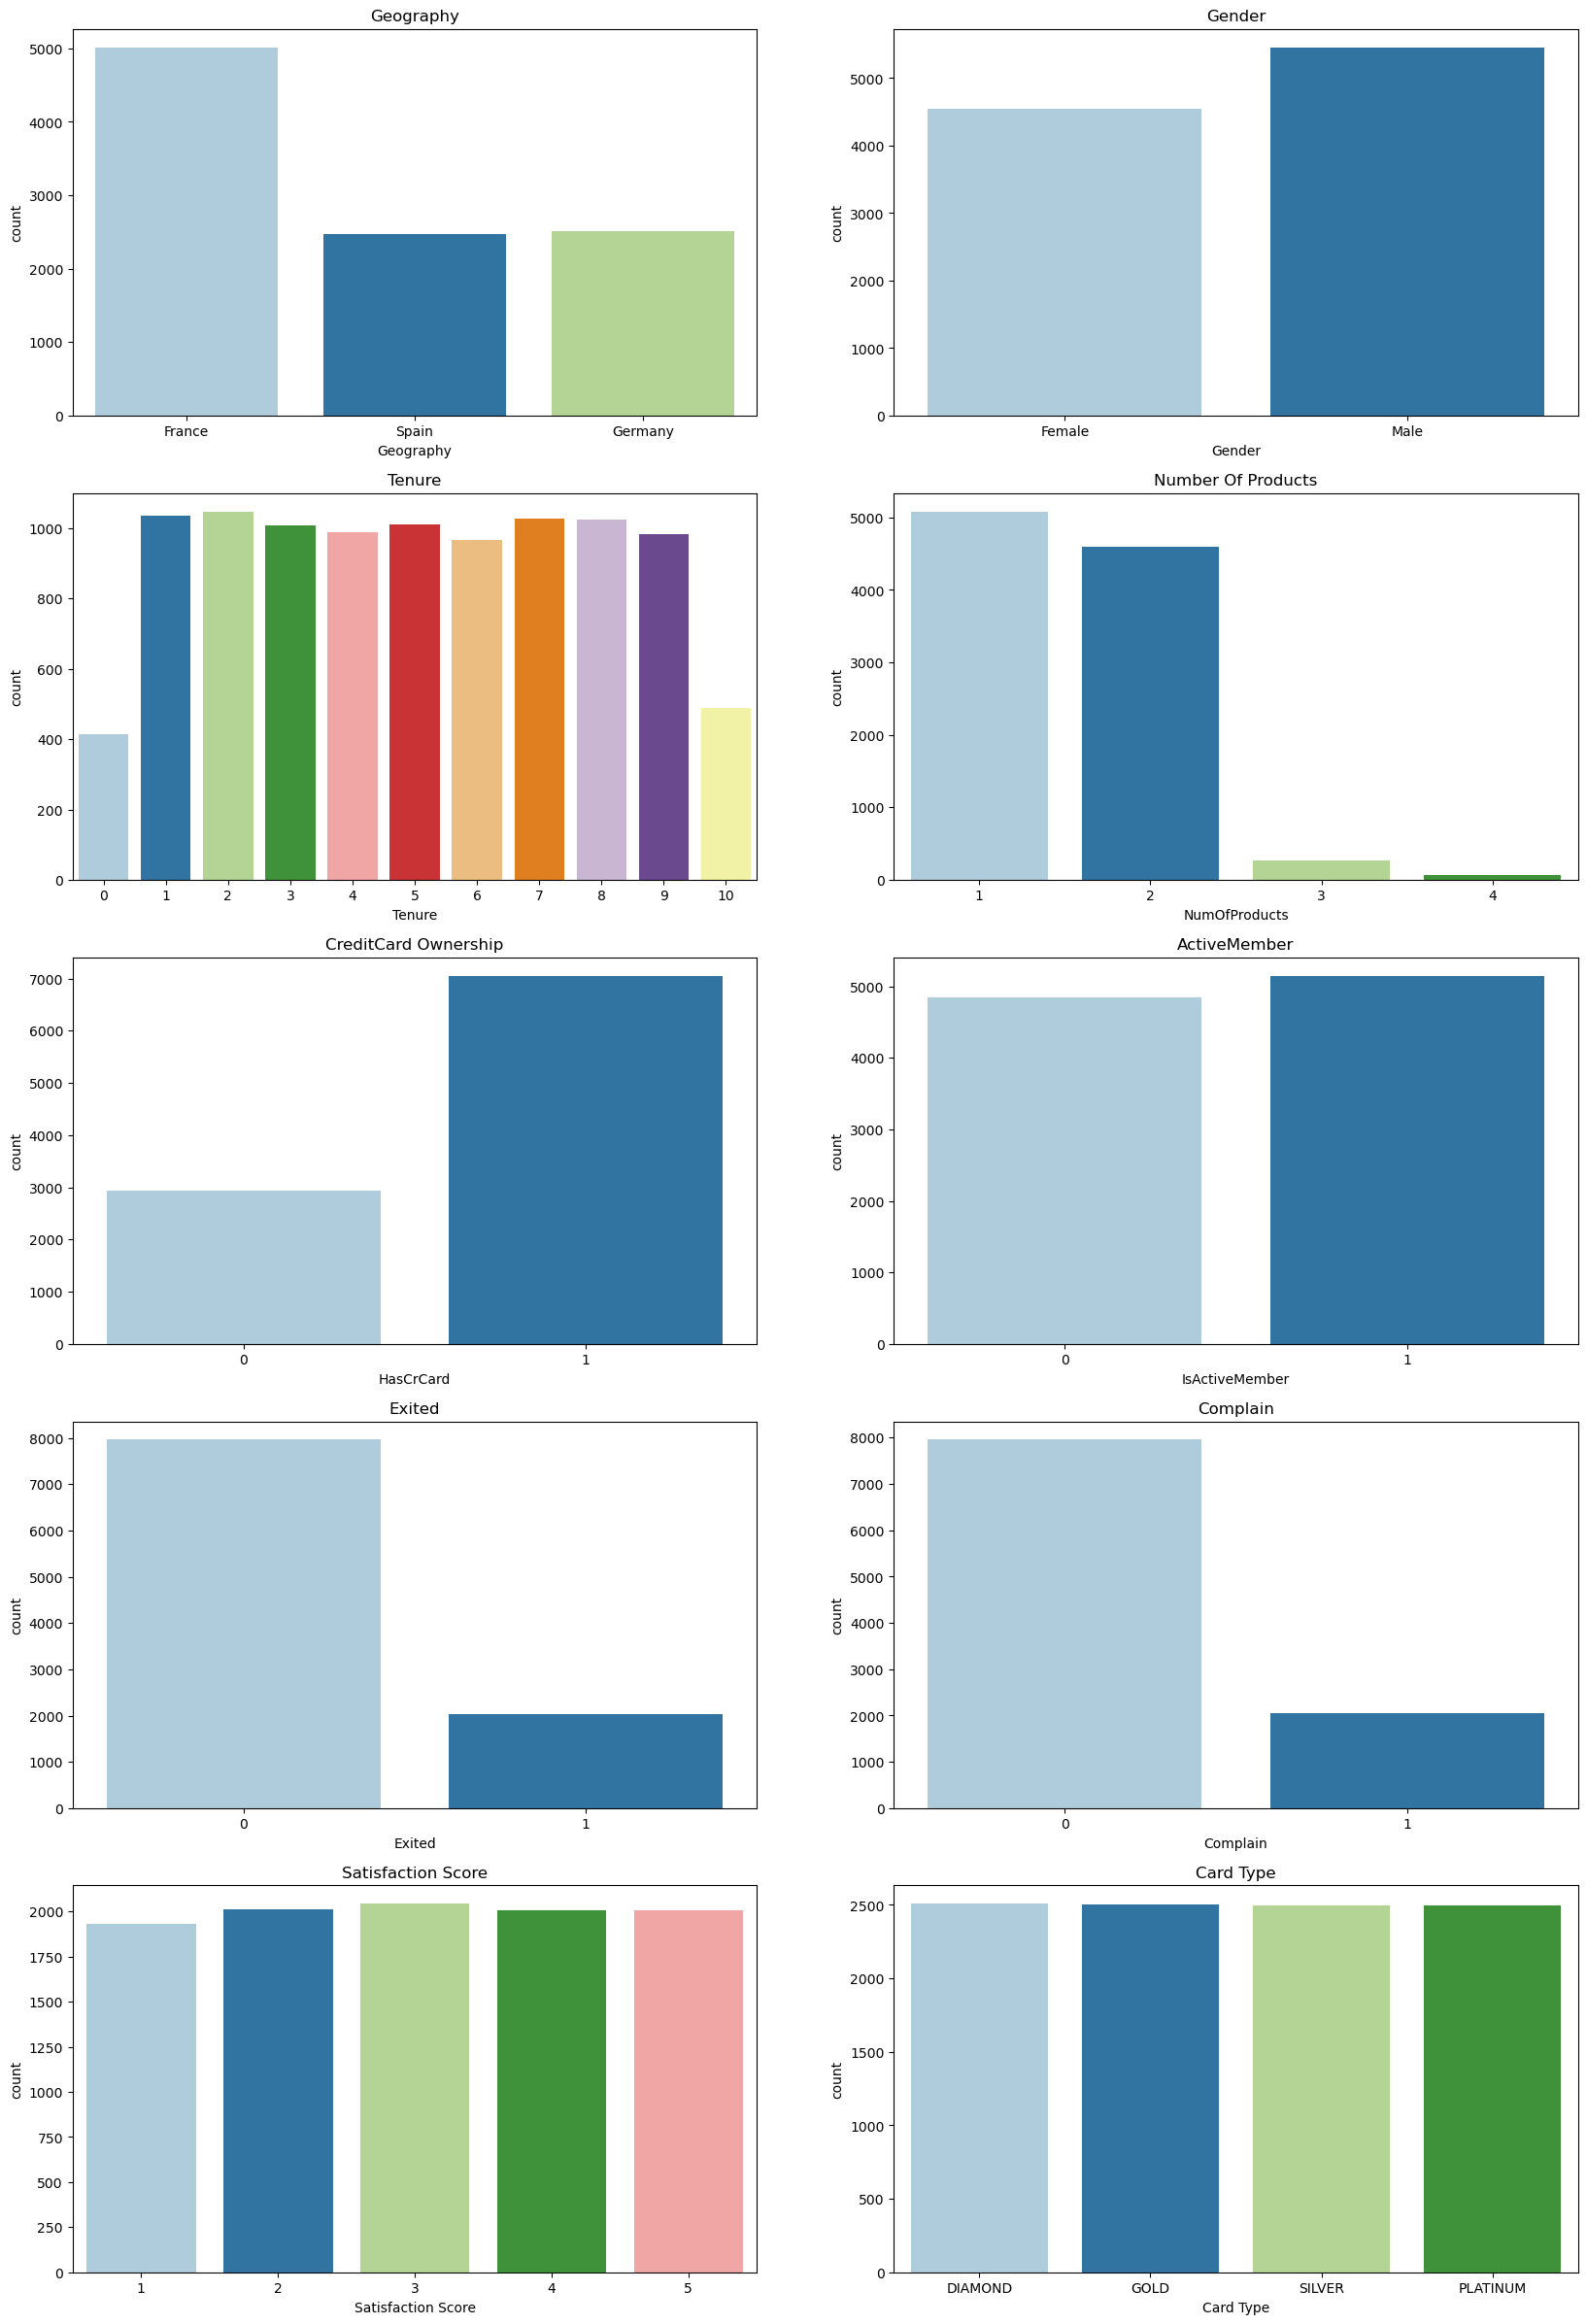

In [23]:
# Count plot
plt.figure(figsize=(20,30))

plt.subplot(5, 2, 1)
plt.gca().set_title('Geography')
sns.countplot(x = 'Geography', palette = 'Paired', data = df_int)

plt.subplot(5, 2, 2)
plt.gca().set_title('Gender')
sns.countplot(x = 'Gender', palette = 'Paired', data = df_int)

plt.subplot(5, 2, 3)
plt.gca().set_title('Tenure')
sns.countplot(x = 'Tenure', palette = 'Paired', data = df_int)

plt.subplot(5, 2, 4)
plt.gca().set_title('Number Of Products')
sns.countplot(x = 'NumOfProducts', palette = 'Paired', data = df_int)

plt.subplot(5, 2, 5)
plt.gca().set_title('CreditCard Ownership')
sns.countplot(x = 'HasCrCard', palette = 'Paired', data = df_int)

plt.subplot(5, 2, 6)
plt.gca().set_title('ActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'Paired', data = df_int)

plt.subplot(5, 2, 7)
plt.gca().set_title('Exited')
sns.countplot(x = 'Exited', palette = 'Paired', data = df_int)

plt.subplot(5, 2, 8)
plt.gca().set_title('Complain')
sns.countplot(x = 'Complain', palette = 'Paired', data = df_int)

plt.subplot(5, 2, 9)
plt.gca().set_title('Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', palette = 'Paired', data = df_int)

plt.subplot(5, 2, 10)
plt.gca().set_title('Card Type')
sns.countplot(x = 'Card Type', palette = 'Paired', data = df_int)

### Bivariate analysis


<Axes: title={'center': 'Card Type'}, xlabel='Card Type', ylabel='count'>

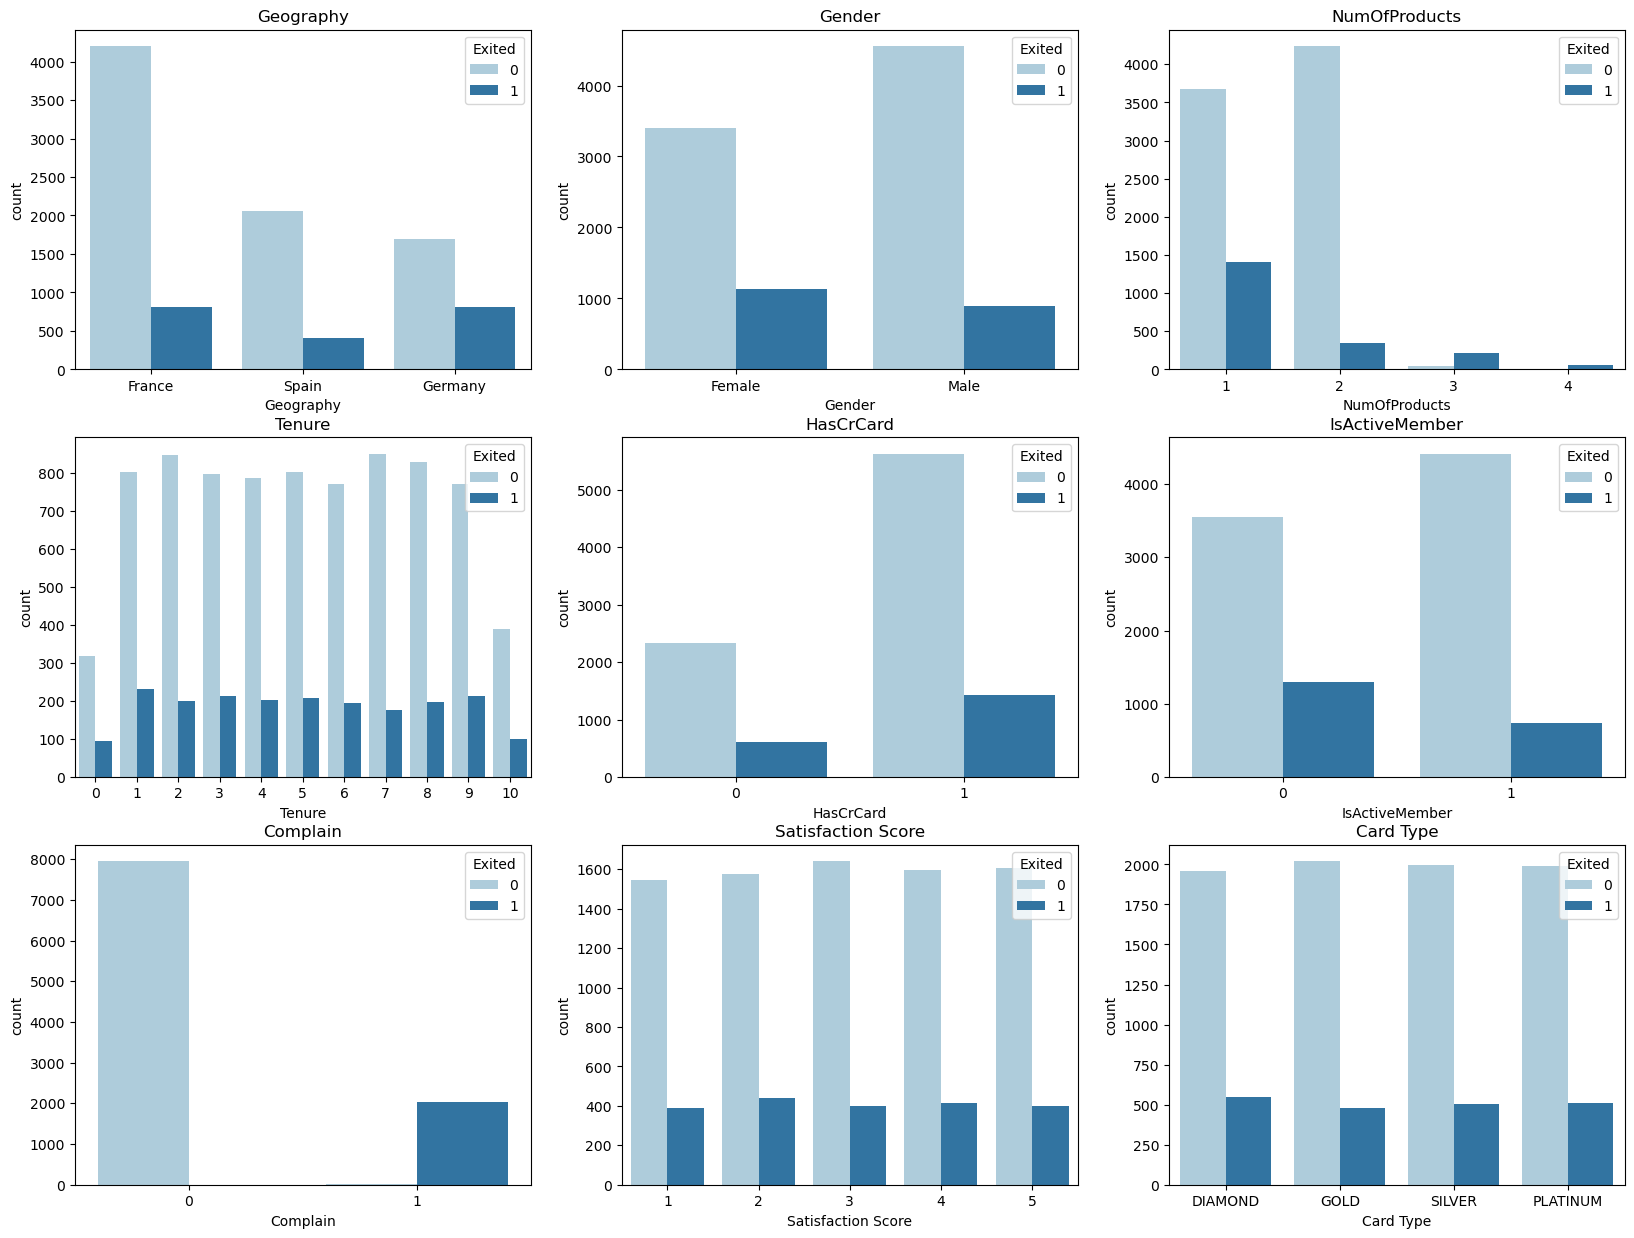

In [24]:
# Categorial variables with exited
plt.figure(figsize=(20,15))

plt.subplot(3, 3, 1)
plt.gca().set_title('Geography')
sns.countplot(x = 'Geography' ,hue = 'Exited', palette = 'Paired', data = df_int)

plt.subplot(3, 3, 2)
plt.gca().set_title('Gender')
sns.countplot(x = 'Gender' ,hue = 'Exited', palette = 'Paired', data = df_int)

plt.subplot(3, 3, 3)
plt.gca().set_title('NumOfProducts')
sns.countplot(x = 'NumOfProducts' ,hue = 'Exited', palette = 'Paired', data = df_int)

plt.subplot(3, 3, 4)
plt.gca().set_title('Tenure')
sns.countplot(x = 'Tenure' ,hue = 'Exited', palette = 'Paired', data = df_int)

plt.subplot(3, 3, 5)
plt.gca().set_title('HasCrCard')
sns.countplot(x = 'HasCrCard' ,hue = 'Exited', palette = 'Paired', data = df_int)

plt.subplot(3, 3, 6)
plt.gca().set_title('IsActiveMember')
sns.countplot(x = 'IsActiveMember' ,hue = 'Exited', palette = 'Paired', data = df_int)

plt.subplot(3, 3, 7)
plt.gca().set_title('Complain')
sns.countplot(x = 'Complain' ,hue = 'Exited', palette = 'Paired', data = df_int)

plt.subplot(3, 3, 8)
plt.gca().set_title('Satisfaction Score')
sns.countplot(x = 'Satisfaction Score' ,hue = 'Exited', palette = 'Paired', data = df_int)

plt.subplot(3, 3, 9)
plt.gca().set_title('Card Type')
sns.countplot(x = 'Card Type' ,hue = 'Exited', palette = 'Paired', data = df_int)


<Axes: xlabel='Exited', ylabel='Point Earned'>

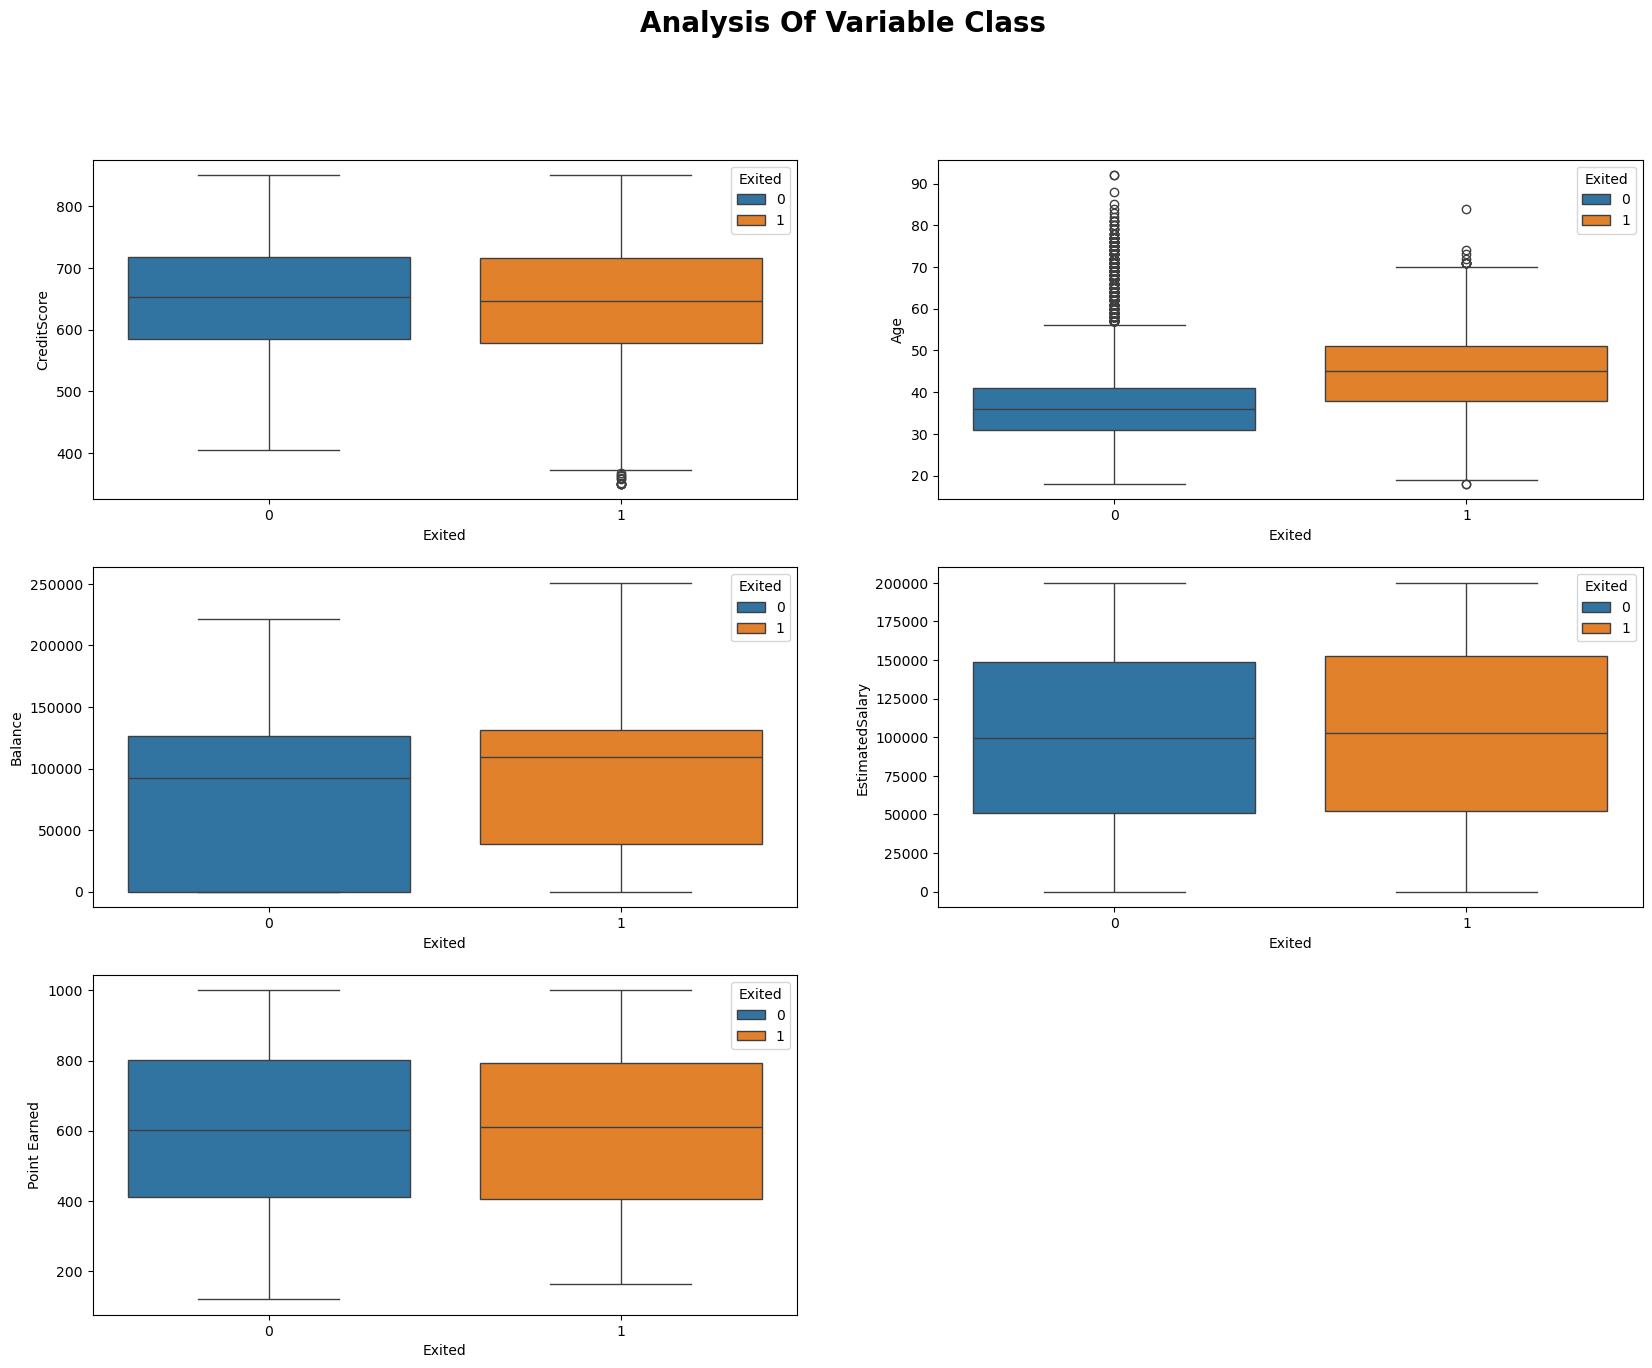

In [25]:
# Numerical variables with exited
plt.figure(figsize=(20,15))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df_int, hue="Exited")

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df_int, hue="Exited")

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df_int, hue="Exited")

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df_int, hue="Exited")

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=df_int, hue="Exited")

### Outliers


In [26]:
def find_outliers_IQR(numeric_df):

   q1=numeric_df.quantile(0.25)

   q3=numeric_df.quantile(0.75)

   IQR=q3-q1

   outliers = numeric_df[((numeric_df<(q1-1.5*IQR)) | (numeric_df>(q3+1.5*IQR)))]

   return outliers

In [27]:
numeric_df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned'],
      dtype='object')

In [28]:
# Define outliers of Age
age_outliers = find_outliers_IQR(numeric_df['Age'])
print("number of outliers: "+ str(len(age_outliers)))
print("max outlier value: "+ str(age_outliers.max()))
print("min outlier value: "+ str(age_outliers.min()))
age_outliers

number of outliers: 359
max outlier value: 92
min outlier value: 63


58      66
85      75
104     65
158     73
181     65
        ..
9753    68
9765    64
9832    64
9894    77
9936    77
Name: Age, Length: 359, dtype: int64

In [29]:
# Define outliers of CreditScore
creditscore_outliers = find_outliers_IQR(numeric_df['CreditScore'])
print("number of outliers: "+ str(len(creditscore_outliers)))
print("max outlier value: "+ str(creditscore_outliers.max()))
print("min outlier value: "+ str(creditscore_outliers.min()))
creditscore_outliers

number of outliers: 15
max outlier value: 382
min outlier value: 350


7       376
942     376
1193    363
1405    359
1631    350
1838    350
1962    358
2473    351
2579    365
8154    367
8723    350
8762    350
9210    382
9356    373
9624    350
Name: CreditScore, dtype: int64

## Model building


In [30]:
df_int.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807,1,0,1,112542,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660,3,1,0,113931,1,1,3,DIAMOND,377


In [31]:
df = df_int.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0,1,1,1,101348,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807,1,0,1,112542,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660,3,1,0,113931,1,1,3,DIAMOND,377


In [32]:
# Label Encoder
hot = pd.get_dummies(df[['Geography', 'Gender', 'Card Type']])

In [33]:
hot.head(3)

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,True,False,False,True,False,True,False,False,False
1,False,False,True,True,False,True,False,False,False
2,True,False,False,True,False,True,False,False,False


In [34]:
# Concat hot to df and drop existing label columns
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Geography', 'Gender', 'Card Type'], axis = 1)
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0,1,1,1,101348,1,1,...,464,True,False,False,True,False,True,False,False,False
1,608,41,1,83807,1,0,1,112542,0,1,...,456,False,False,True,True,False,True,False,False,False
2,502,42,8,159660,3,1,0,113931,1,1,...,377,True,False,False,True,False,True,False,False,False


### Find best sampling strategy


In [66]:
# Simple random sampling function
def simple_sample(df,size):
    return df.sample(
        n=size,
        replace=False,
        random_state=None
    )

In [67]:
# Simple random sampling
df_simple = simple_sample(df,size=1000)
display(df_simple.shape)

(1000, 21)

In [57]:
df_simple.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
7685,705,40,3,92889,1,1,1,109496,0,0,...,451,False,True,False,True,False,False,False,True,False
1252,693,68,4,97705,1,1,1,61569,0,0,...,949,True,False,False,False,True,False,True,False,False
7599,537,45,7,158621,1,1,0,120892,1,1,...,819,True,False,False,True,False,False,False,False,True
2991,584,49,8,172713,1,1,0,113860,0,0,...,475,True,False,False,False,True,True,False,False,False
1666,611,46,5,0,1,1,0,77677,1,1,...,749,True,False,False,True,False,False,False,True,False


In [58]:
# cluster sampling function
def cluster_sample(df, size):
    length = len(df)
    element_max = size
    clusters = length / size
    
    cluster_list = []
    cluster_id = 0
    element_count = 0
    
    for _ in df.iterrows():
        cluster_list.append(cluster_id)
        element_count += 1
        if element_count > (element_max - 1):
            element_count = 0
            cluster_id += 1
    
    df['cluster'] = cluster_list
    rd.seed(None)
    cluster_selected = rd.randint(0, clusters - 1)
    df_clustered = df[df['cluster'] == cluster_selected]
    return df_clustered

In [59]:
# cluster sampling
df_group = cluster_sample(df,size=1000)
display(df_group.shape)

(1000, 22)

In [60]:
df_group.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,cluster
7000,775,28,9,111167,1,1,0,149331,0,0,...,True,False,False,False,True,False,False,False,True,7
7001,681,48,5,139714,2,0,0,73066,0,0,...,False,True,False,False,True,False,True,False,False,7
7002,564,32,10,139875,2,1,0,15378,0,0,...,False,True,False,True,False,False,False,False,True,7
7003,646,44,2,113063,1,0,0,53072,1,1,...,False,True,False,True,False,False,False,False,True,7
7004,670,50,8,138340,1,0,1,3159,0,0,...,True,False,False,True,False,False,False,False,True,7


In [68]:
# systematic-sampling function
def systematic_sample(df, size):
    length = len(df)
    interval = length // size
    rd.seed(None)
    first = rd.randint(0, interval)
    indexes = np.arange(first, length, step = interval)
    return df.iloc[indexes]

In [69]:
# systematic-sampling
df_systematic = systematic_sample(df,size=1000)
display(df_systematic.shape)

(1000, 21)

In [70]:
df_systematic.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
5,645,44,8,113755,2,1,0,149756,1,1,...,484,False,False,True,False,True,True,False,False,False
15,616,45,3,143129,2,0,1,64327,0,0,...,308,False,True,False,False,True,False,True,False,False
25,577,25,3,0,2,0,1,124508,0,0,...,659,True,False,False,False,True,False,False,True,False
35,475,45,0,134264,1,1,0,27822,1,1,...,877,True,False,False,True,False,True,False,False,False
45,776,32,4,109421,2,1,1,126517,0,0,...,296,False,True,False,True,False,False,False,False,True


In [83]:
# Stratified-sampling function
def stratified_sample(df, size, var):
    p = (size / len(df))
    sp = ss(test_size=p)
    for _, y in sp.split(df, df[var]):
        dfy = df.iloc[y]
    return dfy

In [84]:
# Stratified-sampling
df_stratified = stratified_sample(df,size=1000,var='Exited')
display(df_stratified.shape)

(1000, 21)

In [85]:
df_stratified.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
7890,565,49,7,0,2,1,1,89609,0,0,...,579,True,False,False,False,True,False,False,True,False
6075,504,42,3,134936,2,0,0,135178,0,0,...,985,True,False,False,False,True,True,False,False,False
7442,614,36,5,0,2,1,0,130610,0,0,...,877,False,False,True,False,True,False,True,False,False
8502,530,37,8,0,2,1,1,287,0,0,...,605,True,False,False,False,True,True,False,False,False
7355,529,35,5,0,2,1,0,56518,0,0,...,284,False,False,True,True,False,True,False,False,False


In [86]:
# Compare sampling strategy function
def compare_sample(df, size, var):
    dfs = simple_sample(df,size)
    dfc = cluster_sample(df,size)
    dfi = systematic_sample(df,size)
    dfe = stratified_sample(df,size,var)
    print('reference')
    print(f'- general mean: {df[var].mean()}')
    print(' ')
    print('samples')
    print(f'- simple mean: {dfs[var].mean()}')
    print(f'- cluster mean: {dfc[var].mean()}')
    print(f'- systematic mean: {dfi[var].mean()}')
    print(f'- stratified mean: {dfe[var].mean()}')

In [87]:
compare_sample(df,1000,'Exited')

reference
- general mean: 0.2038
 
samples
- simple mean: 0.209
- cluster mean: 0.18
- systematic mean: 0.213
- stratified mean: 0.204


### Stratified Sampling


In [35]:
df.shape

(10000, 21)

In [36]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'],
      dtype='object')

In [37]:
strata = df['Exited'].unique()
train_data = []
test_data = []
for stratum in strata:
    df_stratum = df[df['Exited'] == stratum]
    X_train_stratum, X_test_stratum, y_train_stratum, y_test_stratum = train_test_split(
        df_stratum.drop(columns=['Exited']),  # Features
        df_stratum['Exited'],  # Target
        test_size=0.3,  # Test size
        random_state=42,  # Random state for reproducibility
        stratify=df_stratum['Exited']
    )
    train_data.append((X_train_stratum, y_train_stratum))
    test_data.append((X_test_stratum, y_test_stratum))
X_train = pd.concat([X_train_stratum for X_train_stratum, _ in train_data])
y_train = pd.concat([y_train_stratum for _, y_train_stratum in train_data])
X_test = pd.concat([X_test_stratum for X_test_stratum, _ in test_data])
y_test = pd.concat([y_test_stratum for _, y_test_stratum in test_data])

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6999, 20)
X_test shape: (3001, 20)
y_train shape: (6999,)
y_test shape: (3001,)


### k-NN


In [38]:
# Standardize the feature data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (6999, 20)
X_test_scaled shape: (3001, 20)


In [39]:
# X_train_scaled
X_train_scaled

array([[-0.64483061,  1.89621827, -1.04279676, ..., -0.59104558,
        -0.57344568,  1.75326072],
       [-0.82007891,  1.13861316,  1.04488474, ..., -0.59104558,
         1.74384434, -0.57036583],
       [-0.80977018,  1.61211635, -0.69484984, ..., -0.59104558,
        -0.57344568,  1.75326072],
       ...,
       [-1.8715687 , -0.85010026, -0.69484984, ..., -0.59104558,
        -0.57344568,  1.75326072],
       [ 1.10765238,  0.66510996, -1.04279676, ..., -0.59104558,
         1.74384434, -0.57036583],
       [ 0.60252493, -0.56599835, -1.04279676, ..., -0.59104558,
        -0.57344568, -0.57036583]])

In [40]:
# X_test_scaled
X_test_scaled

array([[ 6.74685992e-01, -2.81896430e-01, -1.04279676e+00, ...,
        -5.91045578e-01,  1.74384434e+00, -5.70365825e-01],
       [-2.28391764e+00,  9.49211878e-01, -6.94849844e-01, ...,
         1.69191690e+00, -5.73445679e-01, -5.70365825e-01],
       [-1.26335402e+00,  2.65382338e+00,  1.04488474e+00, ...,
        -5.91045578e-01,  1.74384434e+00, -5.70365825e-01],
       ...,
       [ 3.13880671e-01,  1.80151763e+00, -1.39074368e+00, ...,
        -5.91045578e-01,  1.74384434e+00, -5.70365825e-01],
       [ 3.03571948e-01, -1.32360346e+00,  1.04398989e-03, ...,
        -5.91045578e-01, -5.73445679e-01, -5.70365825e-01],
       [-1.06748827e+00, -1.87195791e-01,  1.39283166e+00, ...,
        -5.91045578e-01, -5.73445679e-01,  1.75326072e+00]])

In [41]:
# Balance data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [42]:
# X_train_resampled
X_train_resampled

array([[-0.64483061,  1.89621827, -1.04279676, ..., -0.59104558,
        -0.57344568,  1.75326072],
       [-0.82007891,  1.13861316,  1.04488474, ..., -0.59104558,
         1.74384434, -0.57036583],
       [-0.80977018,  1.61211635, -0.69484984, ..., -0.59104558,
        -0.57344568,  1.75326072],
       ...,
       [ 0.03378056,  0.18217984,  0.91520984, ..., -0.59104558,
        -0.57344568,  1.75326072],
       [-1.0495937 ,  0.12549543,  0.0404333 , ..., -0.59104558,
        -0.57344568, -0.57036583],
       [-0.22081777,  1.11195365,  1.65681993, ..., -0.59104558,
        -0.57344568,  1.75326072]])

In [43]:
# Define best parameter for k-NN
knn = KNeighborsClassifier()

k_list = list(range(1,20))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train_resampled, y_train_resampled)


grid.best_params_, grid.best_score_

({'n_neighbors': 2}, 0.996859860039476)

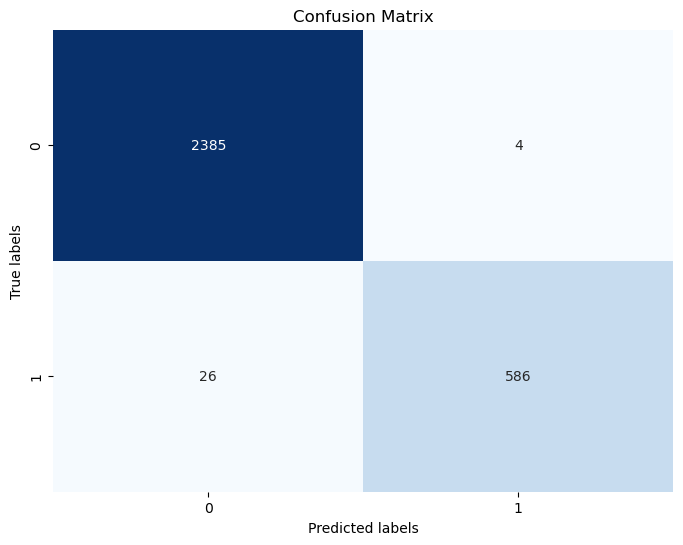

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2389
           1       0.99      0.96      0.98       612

    accuracy                           0.99      3001
   macro avg       0.99      0.98      0.98      3001
weighted avg       0.99      0.99      0.99      3001



In [44]:
# Confusion matrix of k-NN
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

classification_knn = (classification_report(y_test, y_pred))
print(classification_knn)

### Decision tree


In [55]:
# Find best parameter for Decision Tree
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

dt_classifier = DecisionTreeClassifier(random_state=42)
gridDecisionTree = RandomizedSearchCV(dt_classifier, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train_resampled, y_train_resampled)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  6
Max Nvl:  4
Algorithm:  entropy
Score:  0.99874395204422


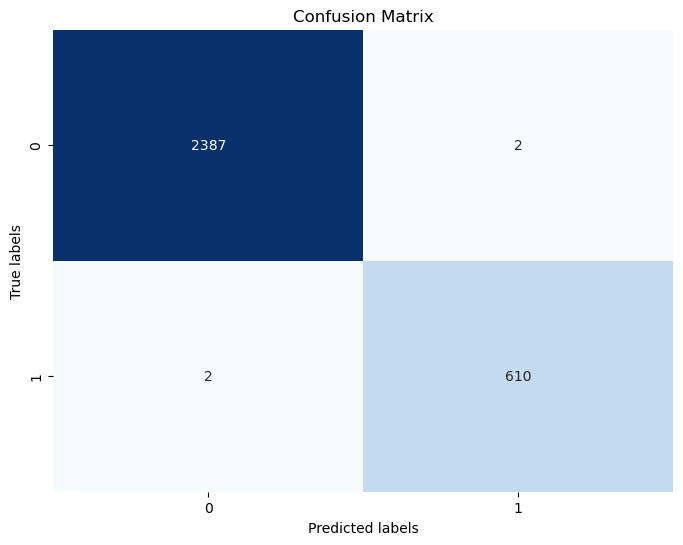

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      1.00      1.00       612

    accuracy                           1.00      3001
   macro avg       1.00      1.00      1.00      3001
weighted avg       1.00      1.00      1.00      3001



In [56]:
# Decision tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 6, max_depth= 4, random_state=42)
decision_tree.fit(X_train_resampled, y_train_resampled)
y_pred_dt = decision_tree.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_dt))

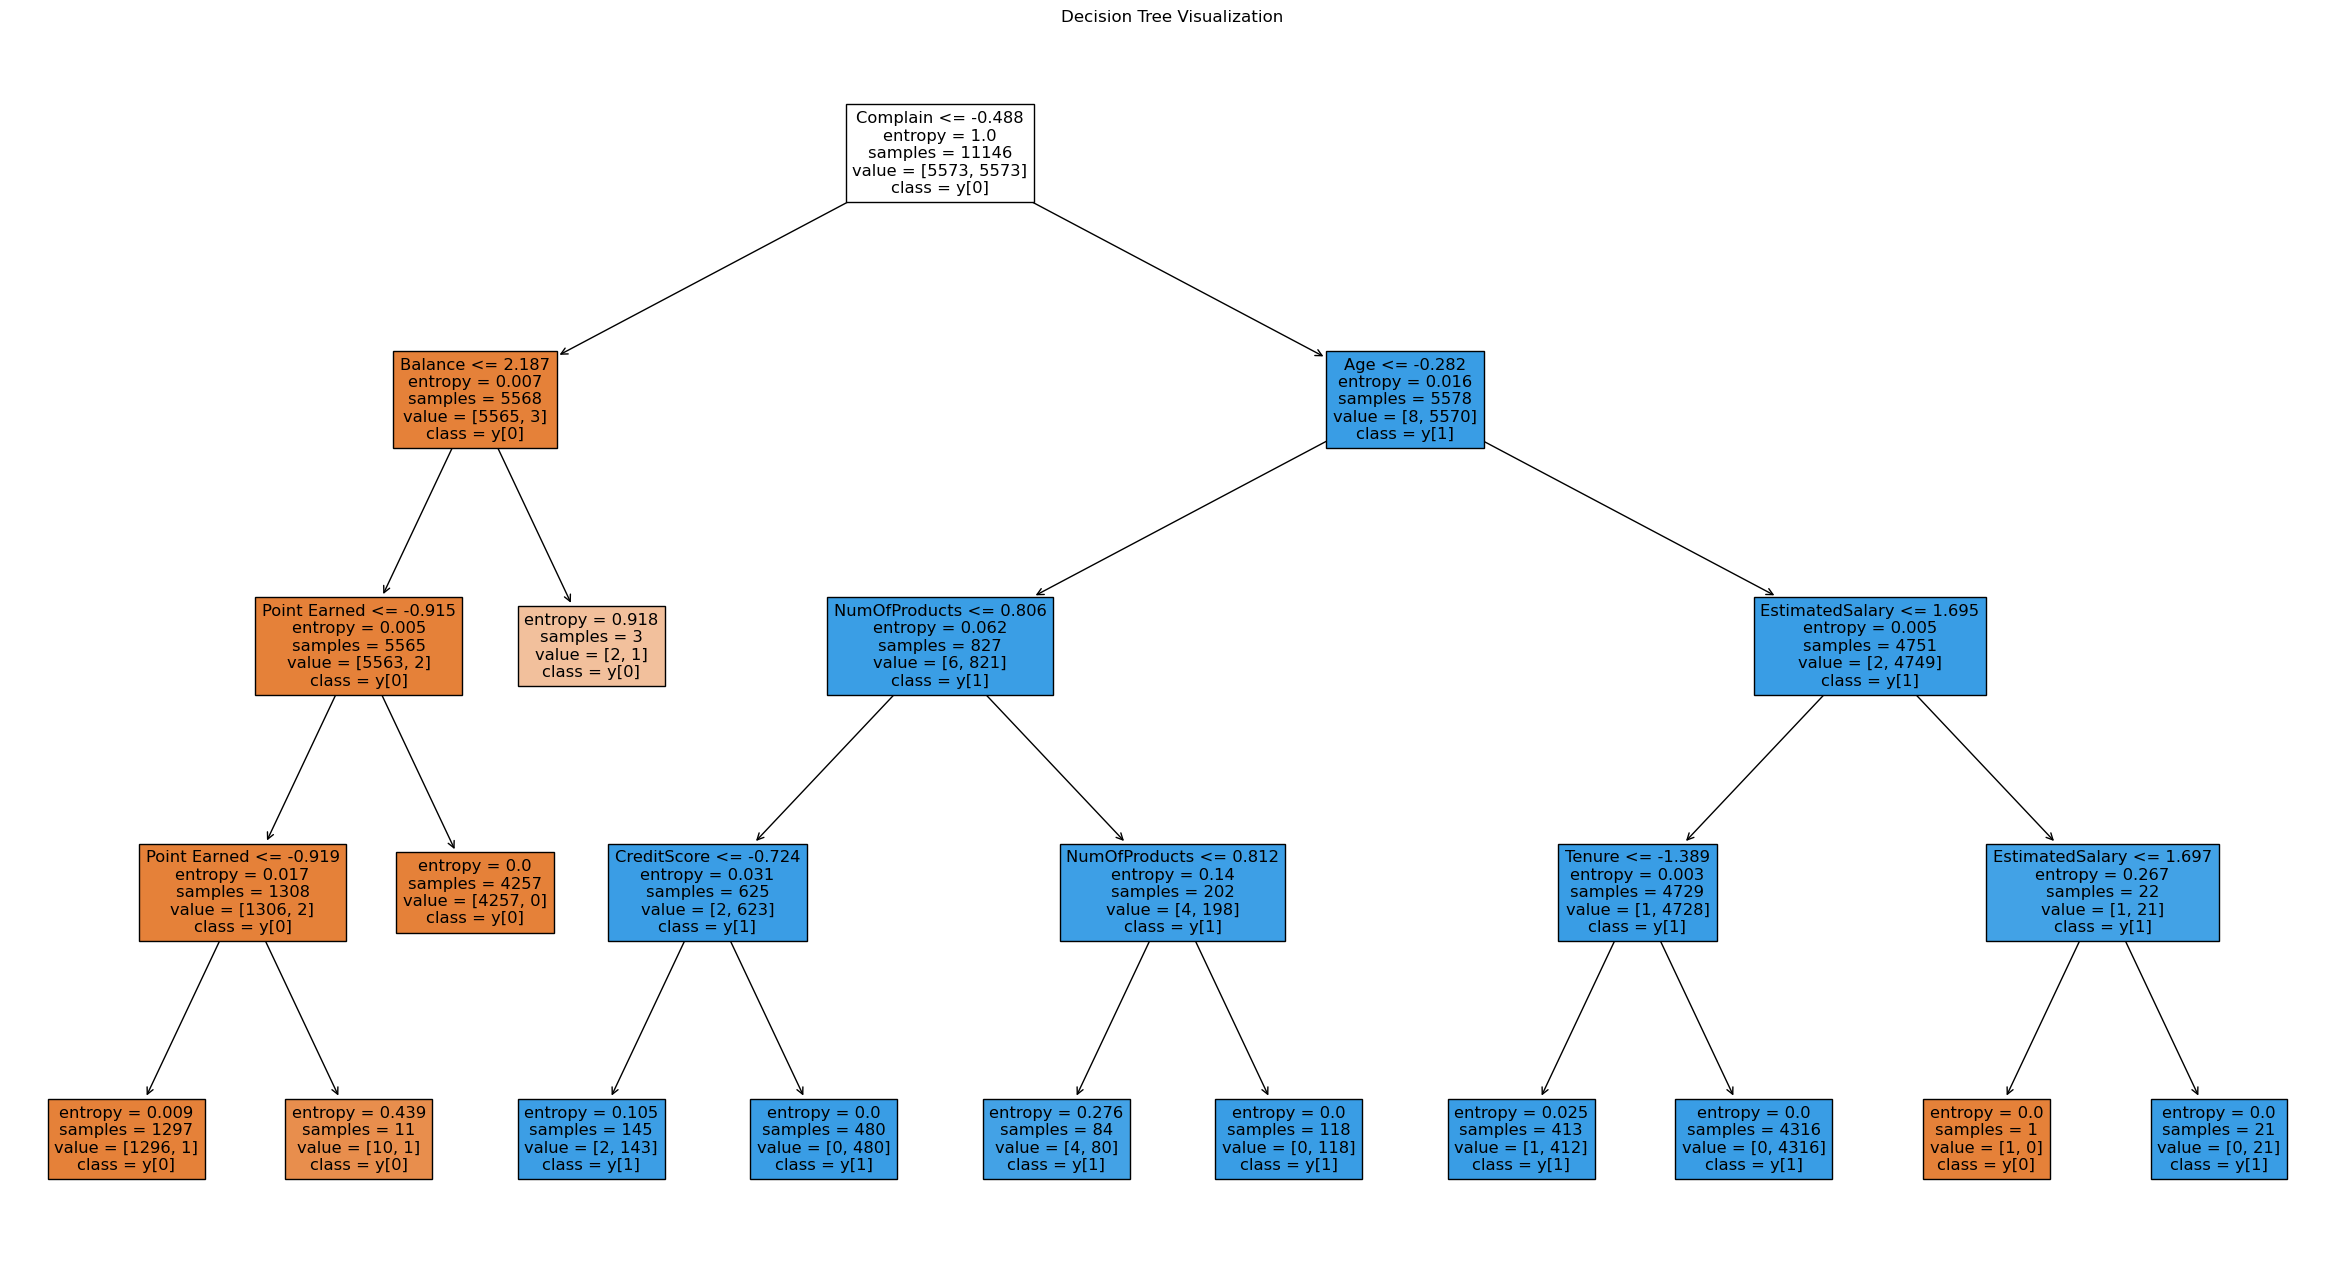

In [43]:
# Plot decision tree
plt.figure(figsize=(30, 16))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=True)
plt.title("Decision Tree Visualization")
plt.show()

In [57]:
# Calculate evaluation metrics for Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

# Calculate evaluation metrics for k-NN classifier
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='macro')
recall_knn = recall_score(y_test, y_pred, average='macro')
f1_knn = f1_score(y_test, y_pred, average='macro')

# Model performance evaluation result

resume = pd.DataFrame({
    'Decision Tree Classifier': [accuracy_dt, precision_dt, recall_dt, f1_dt],
    'k-NN Classifier': [accuracy_knn, precision_knn, recall_knn, f1_knn]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(resume)

           Decision Tree Classifier  k-NN Classifier
Accuracy                   0.998667         0.990003
Precision                  0.997947         0.991218
Recall                     0.997947         0.977921
F1-score                   0.997947         0.984396


### test the model with example dataset

In [78]:
# import new data set
new_df = pd.read_csv("New_customer_record_1000.csv")
new_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,738,Spain,Male,21,2,29866,3,1,0,144017,0,0,1,SILVER,686
1,830,France,Female,29,3,33658,2,1,1,182360,0,0,4,SILVER,709
2,800,Spain,Male,58,8,134888,3,0,0,163355,1,0,5,DIAMOND,834
3,433,Spain,Female,67,10,37745,1,1,1,83502,0,1,3,DIAMOND,882
4,421,France,Male,78,8,70620,2,1,1,163007,0,1,4,DIAMOND,656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,642,France,Female,73,10,249353,4,1,1,47229,0,0,1,GOLD,556
996,549,Germany,Female,45,10,90665,1,1,1,152065,1,0,1,GOLD,861
997,545,France,Female,86,9,133538,2,0,1,154331,1,1,2,DIAMOND,590
998,351,Spain,Female,51,10,49310,4,1,1,95646,1,0,5,PLATINUM,536


In [79]:
# Label encoder
new_hot = pd.get_dummies(new_df[['Geography', 'Gender', 'Card Type']])

In [80]:
new_hot

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,False,False,True,False,True,False,False,False,True
1,True,False,False,True,False,False,False,False,True
2,False,False,True,False,True,True,False,False,False
3,False,False,True,True,False,True,False,False,False
4,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...
995,True,False,False,True,False,False,True,False,False
996,False,True,False,True,False,False,True,False,False
997,True,False,False,True,False,True,False,False,False
998,False,False,True,True,False,False,False,True,False


In [81]:
# Concat hot to df and drop existing label columns
new_df = pd.concat([new_df, new_hot], axis = 1)
new_df_labeled = new_df.drop(['Geography', 'Gender', 'Card Type'], axis = 1)
new_df_labeled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,738,21,2,29866,3,1,0,144017,0,0,...,686,False,False,True,False,True,False,False,False,True
1,830,29,3,33658,2,1,1,182360,0,0,...,709,True,False,False,True,False,False,False,False,True
2,800,58,8,134888,3,0,0,163355,1,0,...,834,False,False,True,False,True,True,False,False,False
3,433,67,10,37745,1,1,1,83502,0,1,...,882,False,False,True,True,False,True,False,False,False
4,421,78,8,70620,2,1,1,163007,0,1,...,656,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,642,73,10,249353,4,1,1,47229,0,0,...,556,True,False,False,True,False,False,True,False,False
996,549,45,10,90665,1,1,1,152065,1,0,...,861,False,True,False,True,False,False,True,False,False
997,545,86,9,133538,2,0,1,154331,1,1,...,590,True,False,False,True,False,True,False,False,False
998,351,51,10,49310,4,1,1,95646,1,0,...,536,False,False,True,True,False,False,False,True,False


In [82]:
X_new = new_df_labeled.drop(['Exited'], axis = 1)
y_new_true = new_df_labeled['Exited']

In [83]:
# Standardize the new feature data
scaler = StandardScaler()
scaler.fit(X_new)
X_new_scaled = scaler.transform(X_new)

print("X_new_scaled_shape:", X_new_scaled.shape)

X_new_scaled_shape: (1000, 20)


In [84]:
# Predict the new data with Decision tree
y_new_pred = decision_tree.predict(X_new_scaled)
y_new_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

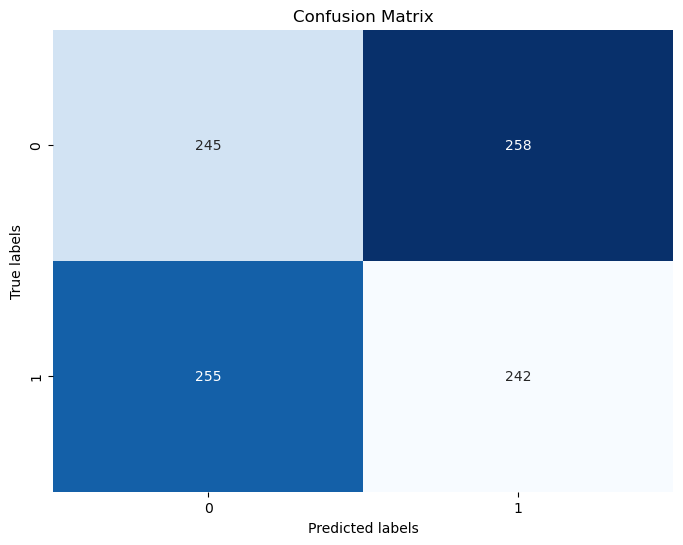

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49       503
           1       0.48      0.49      0.49       497

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



In [85]:
# Confusion matrix of decision tree
new_cm = confusion_matrix(y_new_true, y_new_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_new_true, y_new_pred))

In [86]:
# Predict the new data with knn
y_new_pred_knn = knn.predict(X_new_scaled)
y_new_pred_knn

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

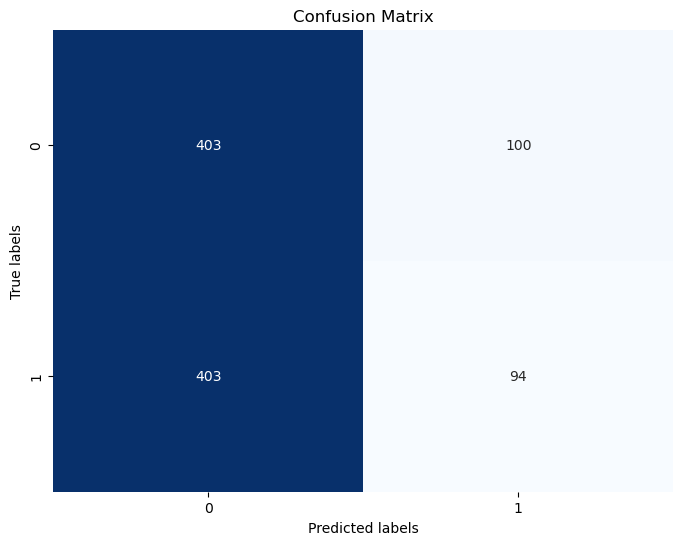

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.80      0.62       503
           1       0.48      0.19      0.27       497

    accuracy                           0.50      1000
   macro avg       0.49      0.50      0.44      1000
weighted avg       0.49      0.50      0.44      1000



In [87]:
# Confusion matrix of knn
new_knn_cm = confusion_matrix(y_new_true, y_new_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(new_knn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_new_true, y_new_pred_knn))

In [88]:
# Calculate evaluation metrics for Decision Tree with new data
accuracy_new_dt = accuracy_score(y_new_true, y_new_pred)
precision_new_dt = precision_score(y_new_true, y_new_pred, average='macro')
recall_new_dt = recall_score(y_new_true, y_new_pred, average='macro')
f1_new_dt = f1_score(y_new_true, y_new_pred, average='macro')

# Calculate evaluation metrics for k-NN with new data
accuracy_new_knn = accuracy_score(y_new_true, y_new_pred_knn)
precision_new_knn = precision_score(y_new_true, y_new_pred_knn, average='macro')
recall_new_knn = recall_score(y_new_true, y_new_pred_knn, average='macro')
f1_new_knn = f1_score(y_new_true, y_new_pred_knn, average='macro')

# Model performance evaluation result of new data

resume_new = pd.DataFrame({
    'Decision Tree Classifier': [accuracy_new_dt, precision_new_dt, recall_new_dt, f1_new_dt],
    'k-NN Classifier': [accuracy_new_knn, precision_new_knn, recall_new_knn, f1_new_knn]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(resume_new)

           Decision Tree Classifier  k-NN Classifier
Accuracy                   0.487000         0.497000
Precision                  0.487000         0.492268
Recall                     0.487000         0.495164
F1-score                   0.486995         0.443903
